In [1]:
from nuscenes import NuScenes
from nuscenes.map_expansion.map_api import NuScenesMap
import os
from extensions.nuscenes import get_maps
from extensions.python import pretty_print
from nuscenes.map_expansion.bitmap import BitMap
import warnings
warnings.filterwarnings('ignore')

DATAROOT = os.path.expanduser('~/work/group_dir/datasets/nuScenes')

nusc_maps = get_maps(dataroot=DATAROOT)

In [2]:
def analyse_road_blocks(nm):
    num_road_blocks = len(nm.road_block)
    print(f'There are {num_road_blocks} road blocks.')
    print()
    ext_count = 0
    hol_count = 0
    for element in nm.road_block:
        if element['exterior_node_tokens'] == nm.road_block[0]['exterior_node_tokens']:
            ext_count += 1
        if element['holes'] == nm.road_block[0]['holes']:
            hol_count += 1
    print(f'The number of exterior_node_tokens equal to the first one is {ext_count}')
    print(f'The number of holes equal to the first one is {hol_count}')
    if ext_count == num_road_blocks and hol_count == num_road_blocks:
        print('All road blocks are the same. Rendering the one and only road block of the map ...')
        bitmap=BitMap(nm.dataroot, nm.map_name, 'basemap')    
        nm.render_record('road_block', nm.road_block[0]['token'], other_layers=[], bitmap=bitmap)

In [11]:
def analyse_ped_crossings(nm):
    none_count = 0
    for pedc in nm.ped_crossing:
        if pedc['road_segment_token'] == None:
            none_count += 1
    print('PedCrossings with no road_segment_token:', none_count)
    print('PedCrossings in total:', len(nm.ped_crossing))

# Hollandvillage

There are 387 road blocks.

The number of exterior_node_tokens equal to the first one is 387
The number of holes equal to the first one is 387
All road blocks are the same. Rendering the one and only road block of the map ...


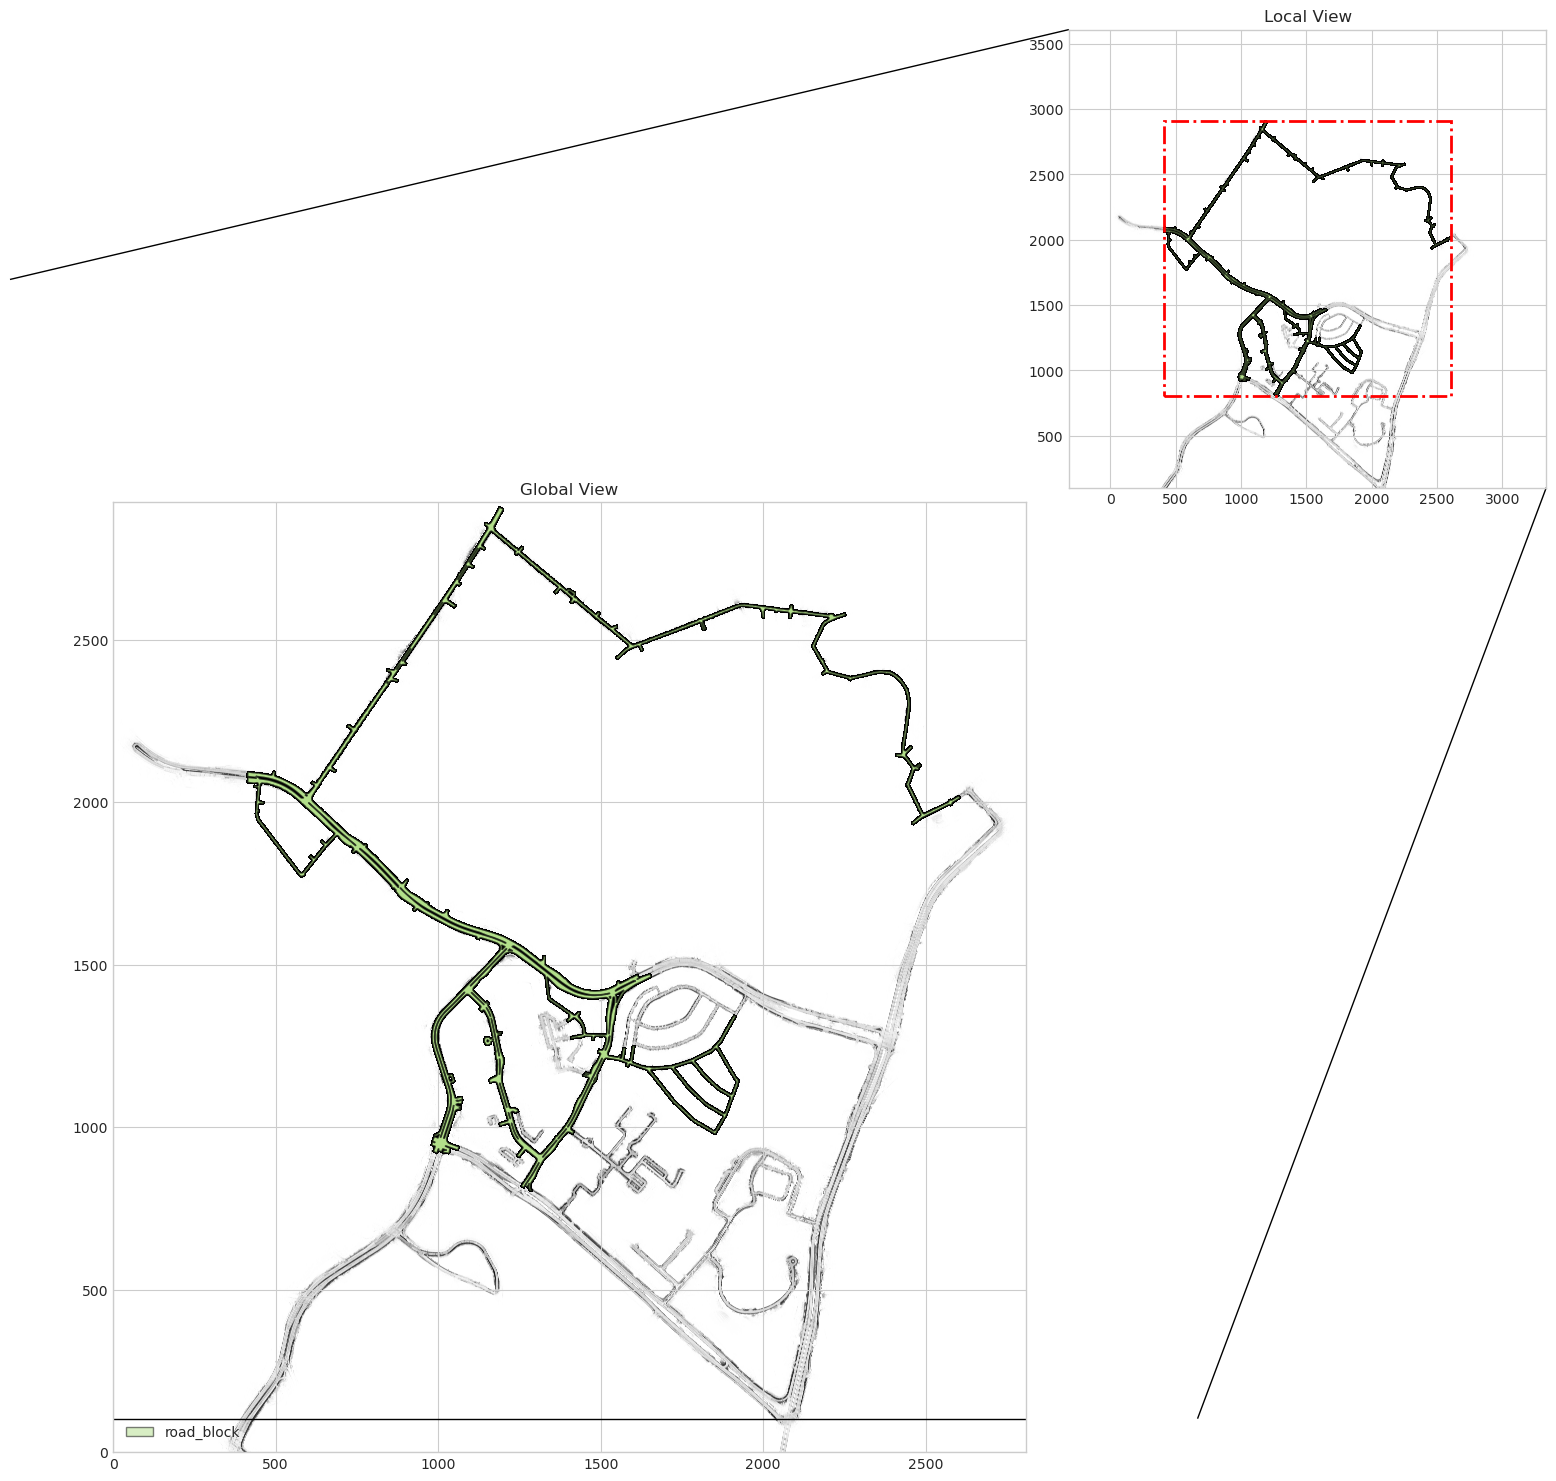

In [3]:
analyse_road_blocks(nusc_maps['singapore-hollandvillage'])

# Queenstown

There are 676 road blocks.

The number of exterior_node_tokens equal to the first one is 676
The number of holes equal to the first one is 676
All road blocks are the same. Rendering the one and only road block of the map ...


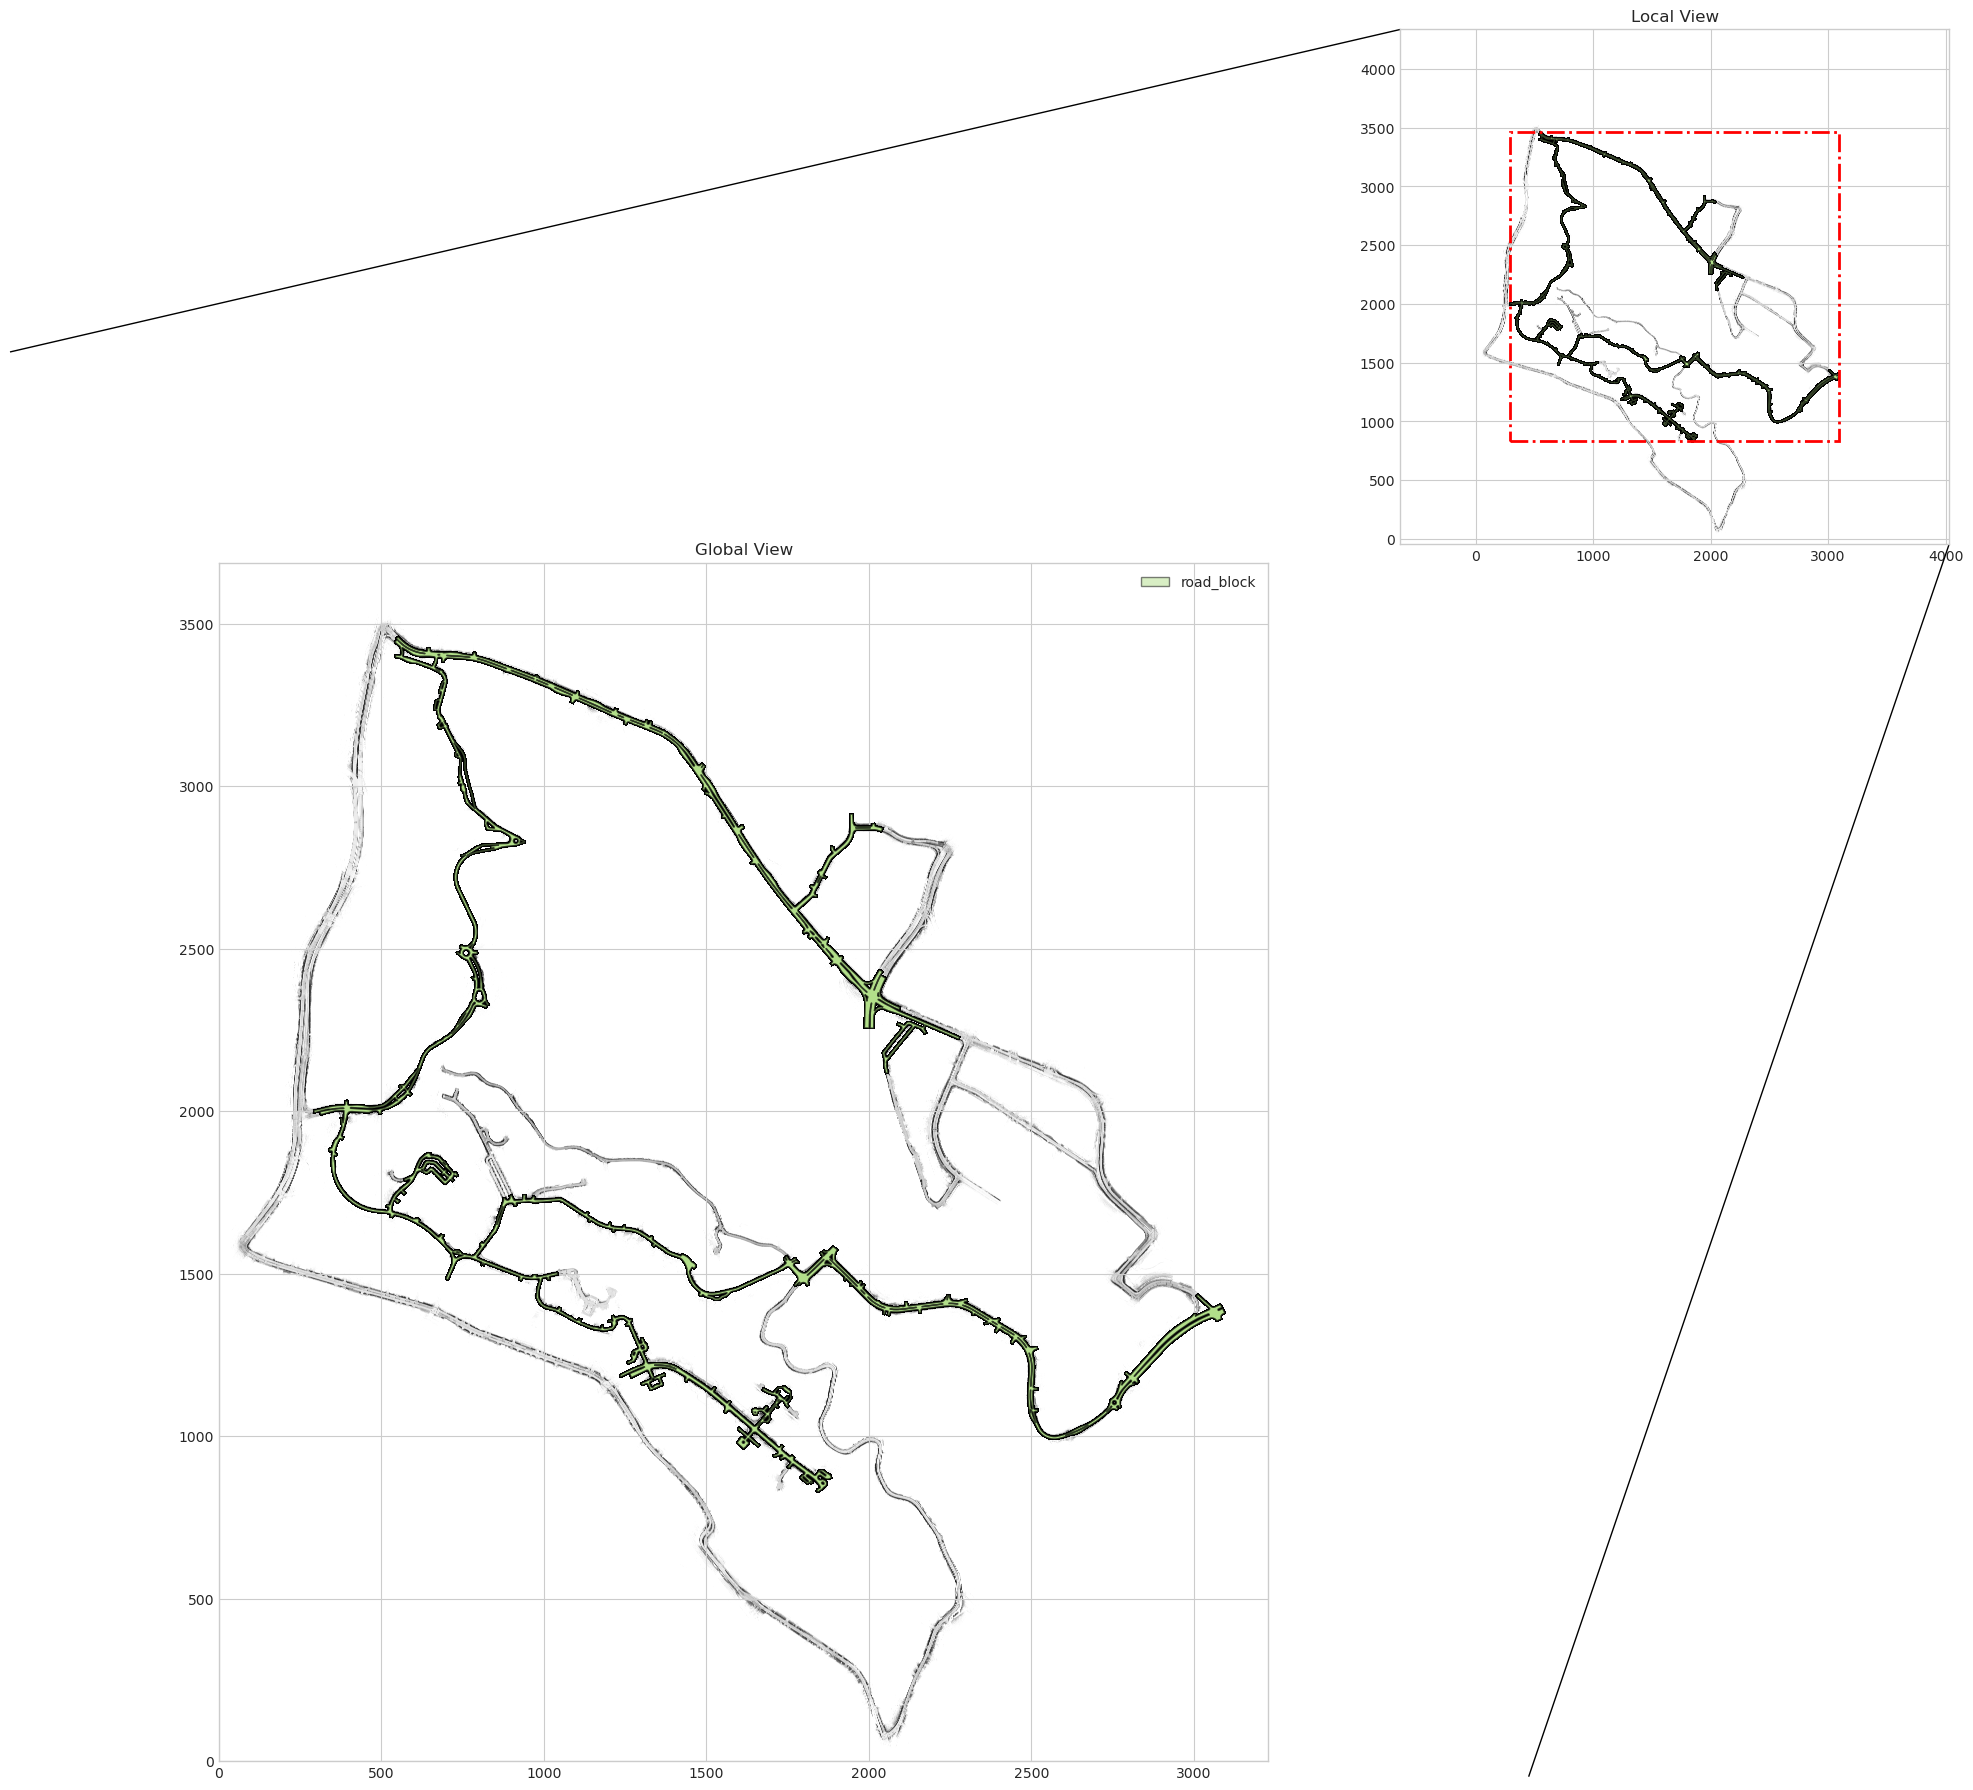

In [4]:
analyse_road_blocks(nusc_maps['singapore-queenstown'])

# PedCrossings

In [12]:
analyse_ped_crossings(nusc_maps['singapore-hollandvillage'])

PedCrossings with no road_segment_token: 28
PedCrossings in total: 28


In [13]:
analyse_ped_crossings(nusc_maps['singapore-queenstown'])

PedCrossings with no road_segment_token: 75
PedCrossings in total: 75


(<Figure size 1843.55x1614.3 with 2 Axes>,
 (<Axes:title={'center':'Global View'}>, <Axes:title={'center':'Local View'}>))

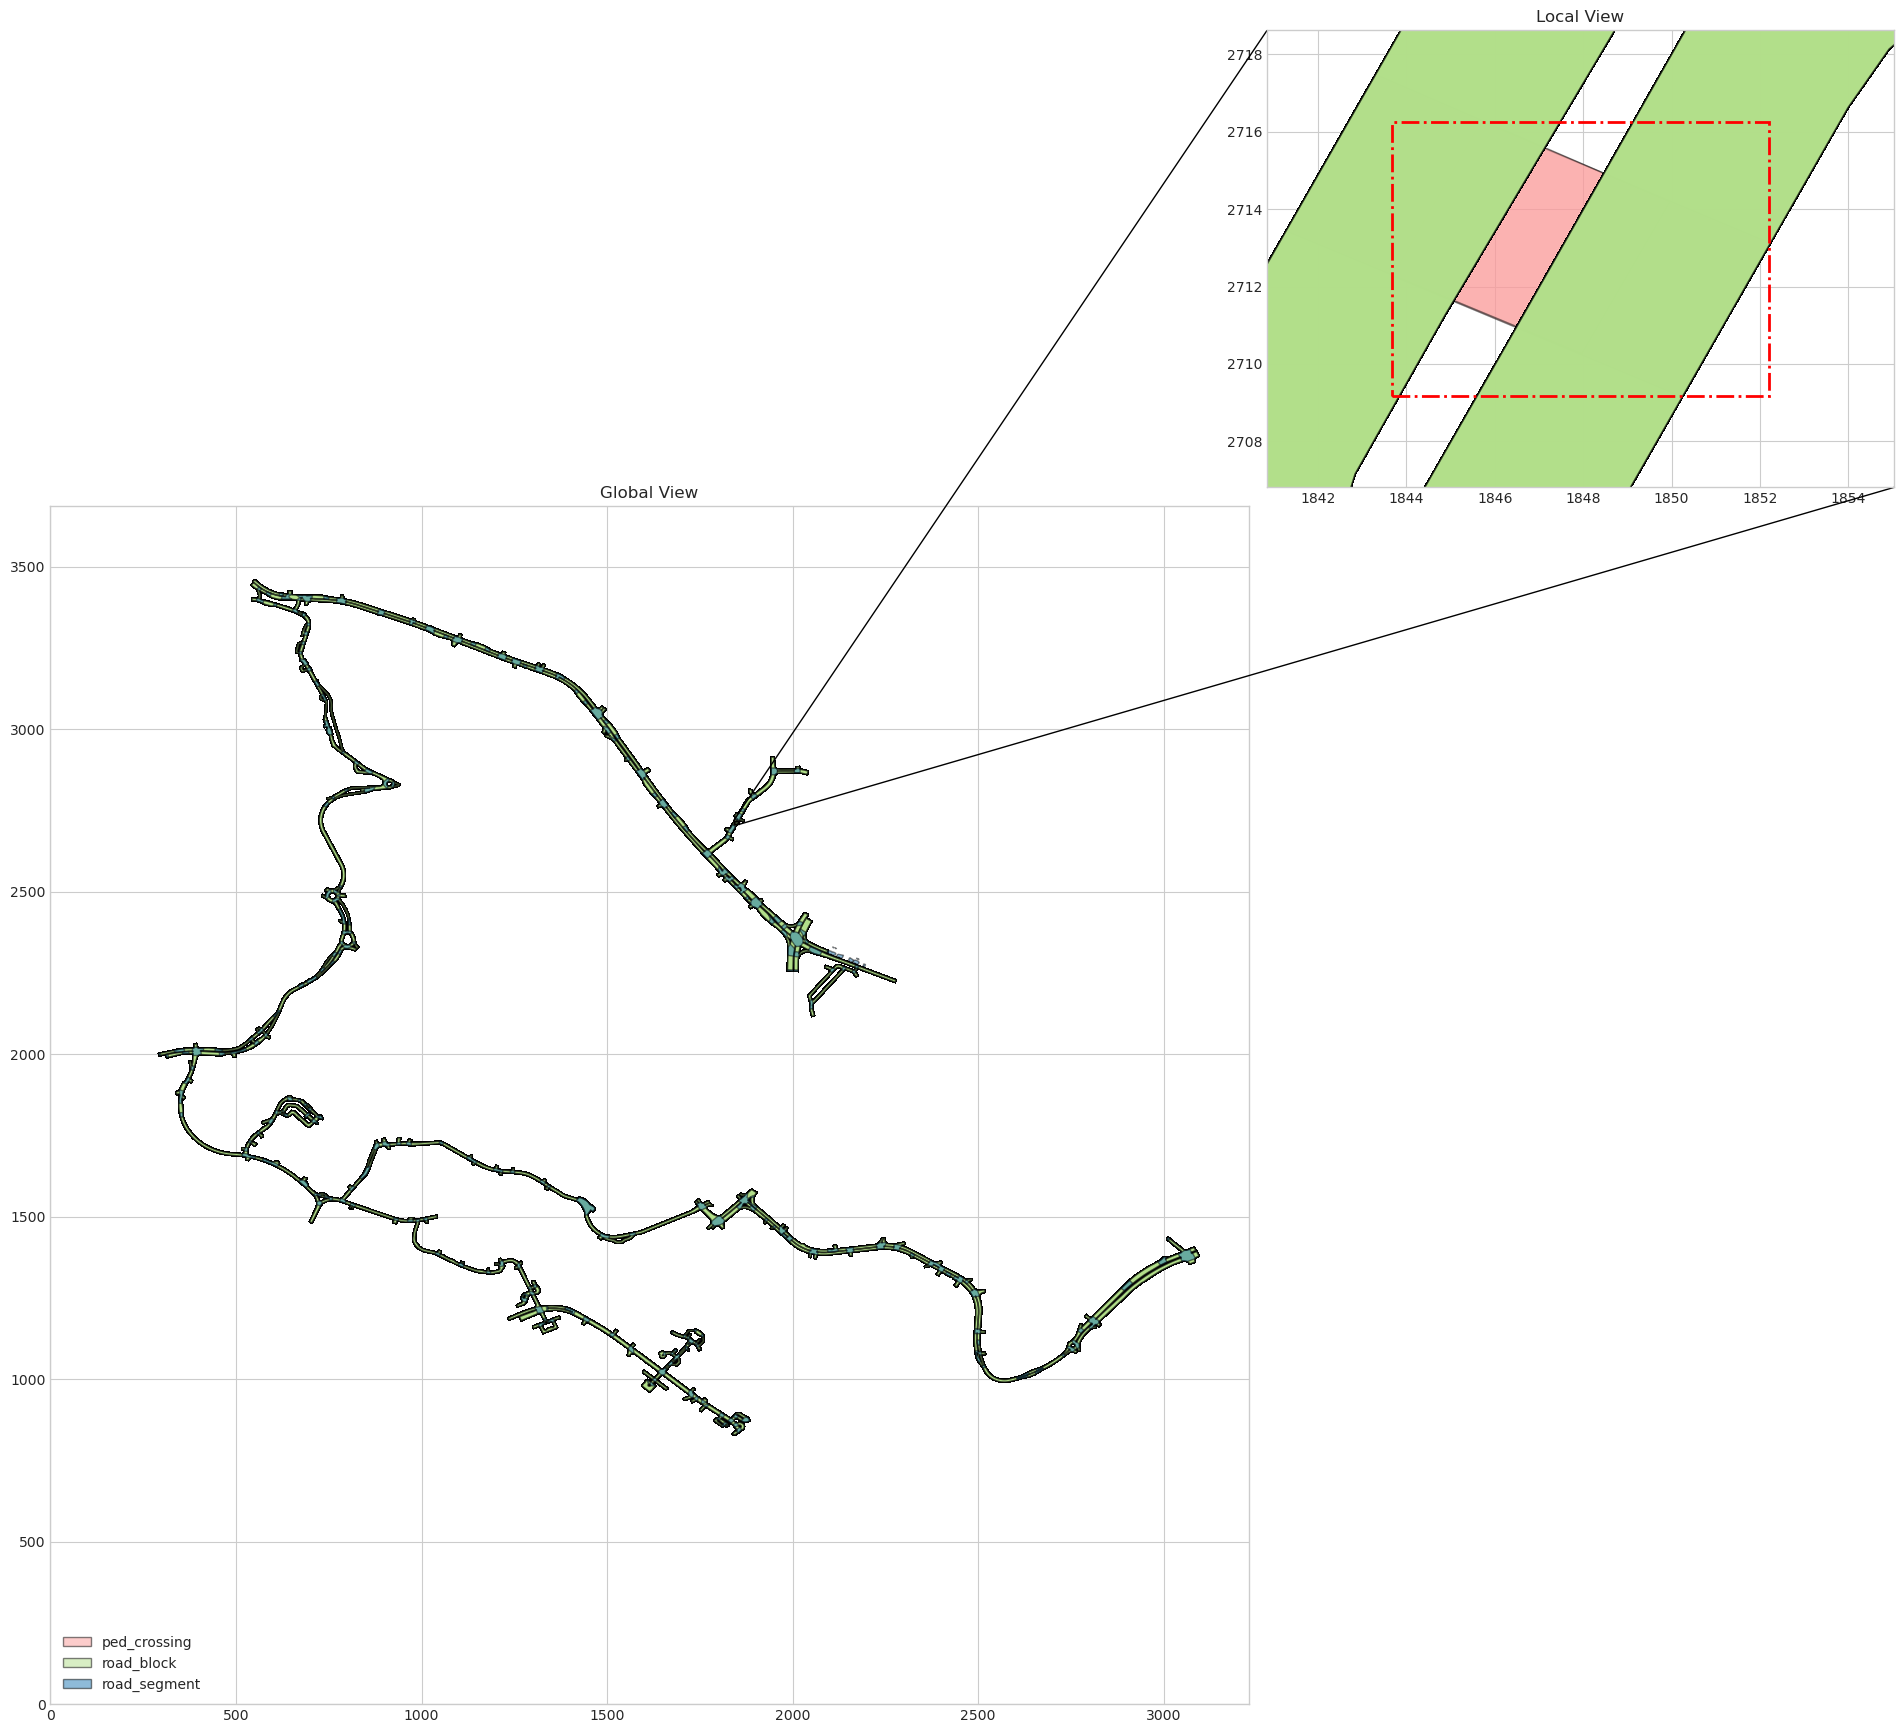

In [16]:
nusc_maps['singapore-queenstown'].render_record('ped_crossing', nusc_maps['singapore-queenstown'].ped_crossing[0]['token'], other_layers=['road_block', 'road_segment'])